In [1]:
# 타이타닉 데이터셋 분석 및 시각화, 모델링 실습
# 1. 데이터셋 로드

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('./datasets/titanic_train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

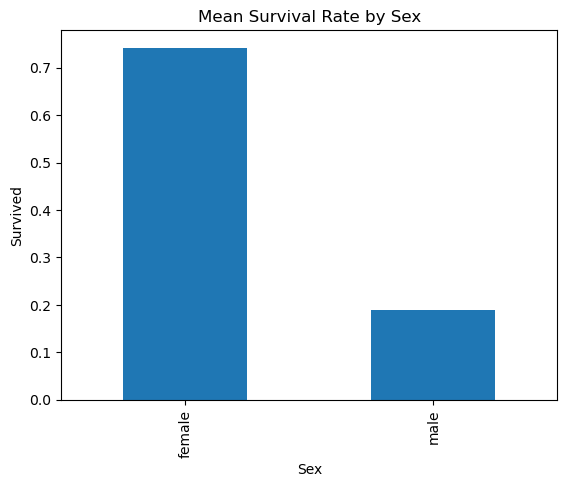

In [5]:
train.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.title('Mean Survival Rate by Sex')
plt.show()

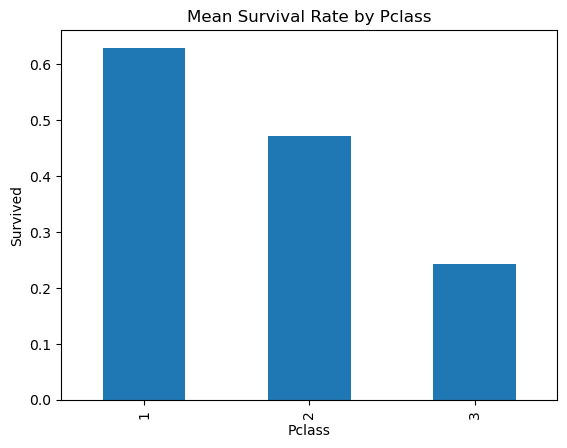

In [6]:
train.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.title('Mean Survival Rate by Pclass')
plt.show()

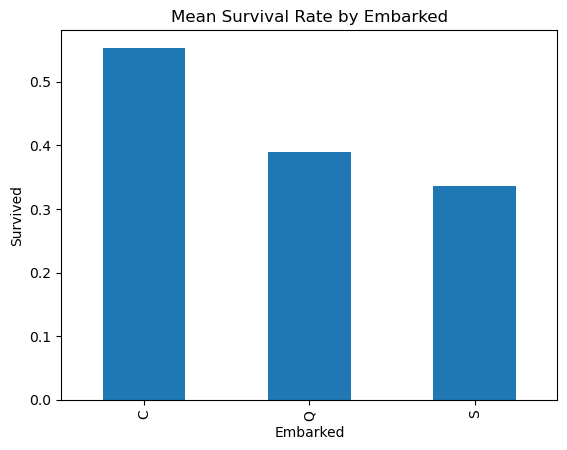

In [7]:
train.groupby('Embarked')['Survived'].mean().plot(kind='bar')
plt.xlabel('Embarked')
plt.ylabel('Survived')
plt.title('Mean Survival Rate by Embarked')
plt.show()

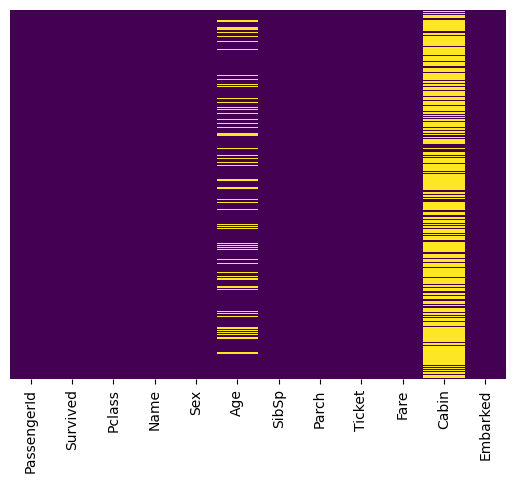

In [8]:
# 결측치 확인 및 시각화
train.isnull().sum()

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [9]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# 필요없는 feature 제거
train = train.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [11]:
from sklearn.preprocessing import OneHotEncoder

onehot_Pclass = OneHotEncoder(sparse=False)

label_Pclass = train['Pclass'].values.reshape(-1, 1)
onehot_Pclass.fit(label_Pclass)
label_Pclass = onehot_Pclass.transform(label_Pclass)
train_Pclass = pd.DataFrame(label_Pclass, columns=['Pclass_1', 'Pclass_2', 'Pclass_3'])
train = pd.concat([train, train_Pclass], axis=1)
train = train.drop(['Pclass'], axis=1)
train.head()

c:\Users\Gloomy\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Survived,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3
0,0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0.0,0.0,1.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1.0,0.0,0.0
2,1,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0.0,0.0,1.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1.0,0.0,0.0
4,0,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0.0,0.0,1.0


In [12]:
onehot_Sex = OneHotEncoder(sparse=False)

label_Sex = train['Sex'].values.reshape(-1, 1)
onehot_Sex.fit(label_Sex)
label_Sex = onehot_Sex.transform(label_Sex)
train_Sex = pd.DataFrame(label_Sex, columns=['female', 'male'])
train = pd.concat([train, train_Sex], axis=1)
train = train.drop(['Sex'], axis=1)
train.head()

c:\Users\Gloomy\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Survived,Name,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,female,male
0,0,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,0.0,0.0,1.0,0.0,1.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,1.0,0.0,0.0,1.0,0.0
2,1,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,0.0,0.0,1.0,1.0,0.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,1.0,0.0,0.0,1.0,0.0
4,0,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,0.0,0.0,1.0,0.0,1.0


In [13]:
# Sibsp, Parch 합치기

train['Family'] = train['SibSp'] + train['Parch'] + 1
train.head()

,Survived,Name,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,female,male,Family
0,0,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,0.0,0.0,1.0,0.0,1.0,2
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,1.0,0.0,0.0,1.0,0.0,2
2,1,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,0.0,0.0,1.0,1.0,0.0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,1.0,0.0,0.0,1.0,0.0,2
4,0,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,0.0,0.0,1.0,0.0,1.0,1


C:\Users\Gloomy\AppData\Local\Temp\ipykernel_12876\591620097.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'])


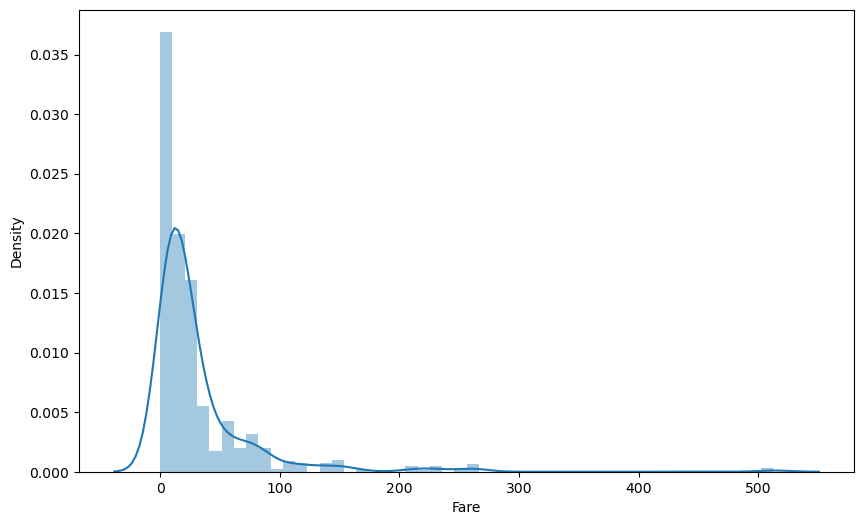

In [14]:
# Fare 시각화

plt.figure(figsize=(10, 6))
sns.distplot(train['Fare'])
plt.show()

In [15]:
# Fare scaling하기

from sklearn.preprocessing import MinMaxScaler

scaler_Fare = MinMaxScaler()

label_Fare = train['Fare'].values.reshape(-1, 1)
scaler_Fare.fit(label_Fare)
label_Fare = scaler_Fare.transform(label_Fare)
train_Fare = pd.DataFrame(label_Fare, columns=['Fare_scaled'])
train = pd.concat([train, train_Fare], axis=1)
train = train.drop(['Fare'], axis=1)
train.head()

,Survived,Name,Age,SibSp,Parch,Embarked,Pclass_1,Pclass_2,Pclass_3,female,male,Family,Fare_scaled
0,0,"Braund, Mr. Owen Harris",22.0,1,0,S,0.0,0.0,1.0,0.0,1.0,2,0.014151
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,C,1.0,0.0,0.0,1.0,0.0,2,0.139136
2,1,"Heikkinen, Miss. Laina",26.0,0,0,S,0.0,0.0,1.0,1.0,0.0,1,0.015469
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,S,1.0,0.0,0.0,1.0,0.0,2,0.103644
4,0,"Allen, Mr. William Henry",35.0,0,0,S,0.0,0.0,1.0,0.0,1.0,1,0.015713


In [16]:
# Embarked 결측치 S로 채운 후 one-hot encoding

train['Embarked'] = train['Embarked'].fillna('S')

onehot_Embarked = OneHotEncoder(sparse=False)

label_Embarked = train['Embarked'].values.reshape(-1, 1)
onehot_Embarked.fit(label_Embarked)
label_Embarked = onehot_Embarked.transform(label_Embarked)
train_Embarked = pd.DataFrame(label_Embarked, columns=['Embarked_C', 'Embarked_Q', 'Embarked_S'])
train = pd.concat([train, train_Embarked], axis=1)
train = train.drop(['Embarked'], axis=1)
train.head()

c:\Users\Gloomy\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Survived,Name,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,female,male,Family,Fare_scaled,Embarked_C,Embarked_Q,Embarked_S
0,0,"Braund, Mr. Owen Harris",22.0,1,0,0.0,0.0,1.0,0.0,1.0,2,0.014151,0.0,0.0,1.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,1.0,0.0,0.0,1.0,0.0,2,0.139136,1.0,0.0,0.0
2,1,"Heikkinen, Miss. Laina",26.0,0,0,0.0,0.0,1.0,1.0,0.0,1,0.015469,0.0,0.0,1.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,1.0,0.0,0.0,1.0,0.0,2,0.103644,0.0,0.0,1.0
4,0,"Allen, Mr. William Henry",35.0,0,0,0.0,0.0,1.0,0.0,1.0,1,0.015713,0.0,0.0,1.0


In [17]:
# Name에서 Mr, Mrs, Miss, Master 추출

train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
train = train.drop(['Name'], axis=1)
train.head()

,Survived,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,female,male,Family,Fare_scaled,Embarked_C,Embarked_Q,Embarked_S,Title
0,0,22.0,1,0,0.0,0.0,1.0,0.0,1.0,2,0.014151,0.0,0.0,1.0,Mr
1,1,38.0,1,0,1.0,0.0,0.0,1.0,0.0,2,0.139136,1.0,0.0,0.0,Mrs
2,1,26.0,0,0,0.0,0.0,1.0,1.0,0.0,1,0.015469,0.0,0.0,1.0,Miss
3,1,35.0,1,0,1.0,0.0,0.0,1.0,0.0,2,0.103644,0.0,0.0,1.0,Mrs
4,0,35.0,0,0,0.0,0.0,1.0,0.0,1.0,1,0.015713,0.0,0.0,1.0,Mr


In [18]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [19]:
# Mr, Mrs, Miss, Master가 아닌 것들은 Other로 통합

def title_change(title):
    if title not in ['Mr', 'Mrs', 'Miss', 'Master']:
        return 'Other'
    else:
        return title
    
train['Title'] = train['Title'].apply(title_change)
train.head()

,Survived,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,female,male,Family,Fare_scaled,Embarked_C,Embarked_Q,Embarked_S,Title
0,0,22.0,1,0,0.0,0.0,1.0,0.0,1.0,2,0.014151,0.0,0.0,1.0,Mr
1,1,38.0,1,0,1.0,0.0,0.0,1.0,0.0,2,0.139136,1.0,0.0,0.0,Mrs
2,1,26.0,0,0,0.0,0.0,1.0,1.0,0.0,1,0.015469,0.0,0.0,1.0,Miss
3,1,35.0,1,0,1.0,0.0,0.0,1.0,0.0,2,0.103644,0.0,0.0,1.0,Mrs
4,0,35.0,0,0,0.0,0.0,1.0,0.0,1.0,1,0.015713,0.0,0.0,1.0,Mr


In [20]:
# Title one-hot encoding

onehot_Title = OneHotEncoder(sparse=False)

label_Title = train['Title'].values.reshape(-1, 1)
onehot_Title.fit(label_Title)
label_Title = onehot_Title.transform(label_Title)
train_Title = pd.DataFrame(label_Title, columns=['Master', 'Miss', 'Mr', 'Mrs', 'Other'])
train = pd.concat([train, train_Title], axis=1)
train.head()

c:\Users\Gloomy\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Survived,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,female,male,Family,Fare_scaled,Embarked_C,Embarked_Q,Embarked_S,Title,Master,Miss,Mr,Mrs,Other
0,0,22.0,1,0,0.0,0.0,1.0,0.0,1.0,2,0.014151,0.0,0.0,1.0,Mr,0.0,0.0,1.0,0.0,0.0
1,1,38.0,1,0,1.0,0.0,0.0,1.0,0.0,2,0.139136,1.0,0.0,0.0,Mrs,0.0,0.0,0.0,1.0,0.0
2,1,26.0,0,0,0.0,0.0,1.0,1.0,0.0,1,0.015469,0.0,0.0,1.0,Miss,0.0,1.0,0.0,0.0,0.0
3,1,35.0,1,0,1.0,0.0,0.0,1.0,0.0,2,0.103644,0.0,0.0,1.0,Mrs,0.0,0.0,0.0,1.0,0.0
4,0,35.0,0,0,0.0,0.0,1.0,0.0,1.0,1,0.015713,0.0,0.0,1.0,Mr,0.0,0.0,1.0,0.0,0.0


In [21]:
train.groupby('Title')['Age'].median()

Title
Master     3.5
Miss      21.0
Mr        30.0
Mrs       35.0
Other     44.5
Name: Age, dtype: float64

C:\Users\Gloomy\AppData\Local\Temp\ipykernel_12876\1761281811.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])


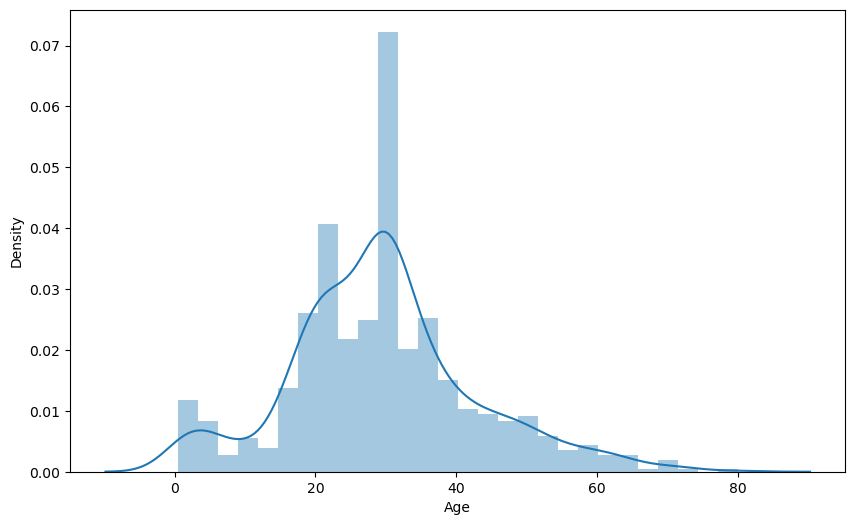

In [22]:
# Age 결측치 채운 후 시각화

train['Age'] = train['Age'].fillna(train.groupby('Title')['Age'].transform('median'))

plt.figure(figsize=(10, 6))
sns.distplot(train['Age'])
plt.show()

In [23]:
# Age scaling

scaler_Age = MinMaxScaler()

label_Age = train['Age'].values.reshape(-1, 1)
scaler_Age.fit(label_Age)
label_Age = scaler_Age.transform(label_Age)
train_Age = pd.DataFrame(label_Age, columns=['Age_scaled'])
train = pd.concat([train, train_Age], axis=1)
train = train.drop(['Age'], axis=1)
train.head()

,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,female,male,Family,Fare_scaled,Embarked_C,Embarked_Q,Embarked_S,Title,Master,Miss,Mr,Mrs,Other,Age_scaled
0,0,1,0,0.0,0.0,1.0,0.0,1.0,2,0.014151,0.0,0.0,1.0,Mr,0.0,0.0,1.0,0.0,0.0,0.271174
1,1,1,0,1.0,0.0,0.0,1.0,0.0,2,0.139136,1.0,0.0,0.0,Mrs,0.0,0.0,0.0,1.0,0.0,0.472229
2,1,0,0,0.0,0.0,1.0,1.0,0.0,1,0.015469,0.0,0.0,1.0,Miss,0.0,1.0,0.0,0.0,0.0,0.321438
3,1,1,0,1.0,0.0,0.0,1.0,0.0,2,0.103644,0.0,0.0,1.0,Mrs,0.0,0.0,0.0,1.0,0.0,0.434531
4,0,0,0,0.0,0.0,1.0,0.0,1.0,1,0.015713,0.0,0.0,1.0,Mr,0.0,0.0,1.0,0.0,0.0,0.434531


In [24]:
# 최종적으로 Title 제거

train = train.drop(['Title'], axis=1)
train.head()

,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,female,male,Family,Fare_scaled,Embarked_C,Embarked_Q,Embarked_S,Master,Miss,Mr,Mrs,Other,Age_scaled
0,0,1,0,0.0,0.0,1.0,0.0,1.0,2,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.271174
1,1,1,0,1.0,0.0,0.0,1.0,0.0,2,0.139136,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.472229
2,1,0,0,0.0,0.0,1.0,1.0,0.0,1,0.015469,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.321438
3,1,1,0,1.0,0.0,0.0,1.0,0.0,2,0.103644,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.434531
4,0,0,0,0.0,0.0,1.0,0.0,1.0,1,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.434531


In [25]:
# train 데이터셋 완성, test 데이터셋도 동일하게 전처리

test = pd.read_csv('./datasets/titanic_test.csv')
submission = pd.DataFrame(test['PassengerId'])

test = test.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

label_Pclass = test['Pclass'].values.reshape(-1, 1)
label_Pclass = onehot_Pclass.transform(label_Pclass)
test_Pclass = pd.DataFrame(label_Pclass, columns=['Pclass_1', 'Pclass_2', 'Pclass_3'])
test = pd.concat([test, test_Pclass], axis=1)
test = test.drop(['Pclass'], axis=1)
test.head()

,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3
0,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0.0,0.0,1.0
1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0.0,0.0,1.0
2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0.0,1.0,0.0
3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0.0,0.0,1.0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0.0,0.0,1.0


In [26]:
# test 데이터셋에서 Sex one-hot encoding

label_Sex = test['Sex'].values.reshape(-1, 1)
label_Sex = onehot_Sex.transform(label_Sex)
test_Sex = pd.DataFrame(label_Sex, columns=['female', 'male'])
test = pd.concat([test, test_Sex], axis=1)
test = test.drop(['Sex'], axis=1)
test.head()

,Name,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,female,male
0,"Kelly, Mr. James",34.5,0,0,7.8292,Q,0.0,0.0,1.0,0.0,1.0
1,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,S,0.0,0.0,1.0,1.0,0.0
2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,Q,0.0,1.0,0.0,0.0,1.0
3,"Wirz, Mr. Albert",27.0,0,0,8.6625,S,0.0,0.0,1.0,0.0,1.0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,S,0.0,0.0,1.0,1.0,0.0


In [27]:
# test 데이터셋에서 SibSp, Parch 합치기

test['Family'] = test['SibSp'] + test['Parch'] + 1
test.head()

,Name,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,female,male,Family
0,"Kelly, Mr. James",34.5,0,0,7.8292,Q,0.0,0.0,1.0,0.0,1.0,1
1,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,S,0.0,0.0,1.0,1.0,0.0,2
2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,Q,0.0,1.0,0.0,0.0,1.0,1
3,"Wirz, Mr. Albert",27.0,0,0,8.6625,S,0.0,0.0,1.0,0.0,1.0,1
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,S,0.0,0.0,1.0,1.0,0.0,3


In [28]:
# test 데이터셋에서 Fare 결측치가 있는 행 8.0500로 채운 후 scaling

test['Fare'] = test['Fare'].fillna(8.0500)

label_Fare = test['Fare'].values.reshape(-1, 1)
label_Fare = scaler_Fare.transform(label_Fare)
test_Fare = pd.DataFrame(label_Fare, columns=['Fare_scaled'])
test = pd.concat([test, test_Fare], axis=1)
test = test.drop(['Fare'], axis=1)
test.head()

,Name,Age,SibSp,Parch,Embarked,Pclass_1,Pclass_2,Pclass_3,female,male,Family,Fare_scaled
0,"Kelly, Mr. James",34.5,0,0,Q,0.0,0.0,1.0,0.0,1.0,1,0.015282
1,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,S,0.0,0.0,1.0,1.0,0.0,2,0.013663
2,"Myles, Mr. Thomas Francis",62.0,0,0,Q,0.0,1.0,0.0,0.0,1.0,1,0.018909
3,"Wirz, Mr. Albert",27.0,0,0,S,0.0,0.0,1.0,0.0,1.0,1,0.016908
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,S,0.0,0.0,1.0,1.0,0.0,3,0.023984


In [29]:
# test 데이터셋에서 Embarked one-hot encoding

label_Embarked = test['Embarked'].values.reshape(-1, 1)
label_Embarked = onehot_Embarked.transform(label_Embarked)
test_Embarked = pd.DataFrame(label_Embarked, columns=['Embarked_C', 'Embarked_Q', 'Embarked_S'])

test = pd.concat([test, test_Embarked], axis=1)
test = test.drop(['Embarked'], axis=1)
test.head()

,Name,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,female,male,Family,Fare_scaled,Embarked_C,Embarked_Q,Embarked_S
0,"Kelly, Mr. James",34.5,0,0,0.0,0.0,1.0,0.0,1.0,1,0.015282,0.0,1.0,0.0
1,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,0.0,0.0,1.0,1.0,0.0,2,0.013663,0.0,0.0,1.0
2,"Myles, Mr. Thomas Francis",62.0,0,0,0.0,1.0,0.0,0.0,1.0,1,0.018909,0.0,1.0,0.0
3,"Wirz, Mr. Albert",27.0,0,0,0.0,0.0,1.0,0.0,1.0,1,0.016908,0.0,0.0,1.0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,0.0,0.0,1.0,1.0,0.0,3,0.023984,0.0,0.0,1.0


In [30]:
# test 데이터셋에서 Name에서 Mr, Mrs, Miss, Master 추출

test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test = test.drop(['Name'], axis=1)
test.head()

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,female,male,Family,Fare_scaled,Embarked_C,Embarked_Q,Embarked_S,Title
0,34.5,0,0,0.0,0.0,1.0,0.0,1.0,1,0.015282,0.0,1.0,0.0,Mr
1,47.0,1,0,0.0,0.0,1.0,1.0,0.0,2,0.013663,0.0,0.0,1.0,Mrs
2,62.0,0,0,0.0,1.0,0.0,0.0,1.0,1,0.018909,0.0,1.0,0.0,Mr
3,27.0,0,0,0.0,0.0,1.0,0.0,1.0,1,0.016908,0.0,0.0,1.0,Mr
4,22.0,1,1,0.0,0.0,1.0,1.0,0.0,3,0.023984,0.0,0.0,1.0,Mrs


In [31]:
# Mr, Mrs, Miss, Master가 아닌 것들은 Other로 통합

test['Title'] = test['Title'].apply(title_change)
test.head()

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,female,male,Family,Fare_scaled,Embarked_C,Embarked_Q,Embarked_S,Title
0,34.5,0,0,0.0,0.0,1.0,0.0,1.0,1,0.015282,0.0,1.0,0.0,Mr
1,47.0,1,0,0.0,0.0,1.0,1.0,0.0,2,0.013663,0.0,0.0,1.0,Mrs
2,62.0,0,0,0.0,1.0,0.0,0.0,1.0,1,0.018909,0.0,1.0,0.0,Mr
3,27.0,0,0,0.0,0.0,1.0,0.0,1.0,1,0.016908,0.0,0.0,1.0,Mr
4,22.0,1,1,0.0,0.0,1.0,1.0,0.0,3,0.023984,0.0,0.0,1.0,Mrs


In [32]:
# test 데이터셋에서 Title one-hot encoding

label_Title = test['Title'].values.reshape(-1, 1)
label_Title = onehot_Title.transform(label_Title)
test_Title = pd.DataFrame(label_Title, columns=['Master', 'Miss', 'Mr', 'Mrs', 'Other'])
test = pd.concat([test, test_Title], axis=1)
test.head()

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,female,male,Family,Fare_scaled,Embarked_C,Embarked_Q,Embarked_S,Title,Master,Miss,Mr,Mrs,Other
0,34.5,0,0,0.0,0.0,1.0,0.0,1.0,1,0.015282,0.0,1.0,0.0,Mr,0.0,0.0,1.0,0.0,0.0
1,47.0,1,0,0.0,0.0,1.0,1.0,0.0,2,0.013663,0.0,0.0,1.0,Mrs,0.0,0.0,0.0,1.0,0.0
2,62.0,0,0,0.0,1.0,0.0,0.0,1.0,1,0.018909,0.0,1.0,0.0,Mr,0.0,0.0,1.0,0.0,0.0
3,27.0,0,0,0.0,0.0,1.0,0.0,1.0,1,0.016908,0.0,0.0,1.0,Mr,0.0,0.0,1.0,0.0,0.0
4,22.0,1,1,0.0,0.0,1.0,1.0,0.0,3,0.023984,0.0,0.0,1.0,Mrs,0.0,0.0,0.0,1.0,0.0


In [33]:
# test 데이터셋에서 Age 결측치 채운 후 scaling

def title_age_mapping(title):
    if title == 'Master':
        return 3.5
    elif title == 'Miss':
        return 21.0
    elif title == 'Mr':
        return 30.0
    elif title == 'Mrs':
        return 35.0
    else:
        return 44.5
    
test['Age'] = test['Age'].fillna(test['Title'].apply(title_age_mapping))

label_Age = test['Age'].values.reshape(-1, 1)
label_Age = scaler_Age.transform(label_Age)
test_Age = pd.DataFrame(label_Age, columns=['Age_scaled'])
test = pd.concat([test, test_Age], axis=1)
test = test.drop(['Age'], axis=1)
test.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,female,male,Family,Fare_scaled,Embarked_C,Embarked_Q,Embarked_S,Title,Master,Miss,Mr,Mrs,Other,Age_scaled
0,0,0,0.0,0.0,1.0,0.0,1.0,1,0.015282,0.0,1.0,0.0,Mr,0.0,0.0,1.0,0.0,0.0,0.428248
1,1,0,0.0,0.0,1.0,1.0,0.0,2,0.013663,0.0,0.0,1.0,Mrs,0.0,0.0,0.0,1.0,0.0,0.585323
2,0,0,0.0,1.0,0.0,0.0,1.0,1,0.018909,0.0,1.0,0.0,Mr,0.0,0.0,1.0,0.0,0.0,0.773813
3,0,0,0.0,0.0,1.0,0.0,1.0,1,0.016908,0.0,0.0,1.0,Mr,0.0,0.0,1.0,0.0,0.0,0.334004
4,1,1,0.0,0.0,1.0,1.0,0.0,3,0.023984,0.0,0.0,1.0,Mrs,0.0,0.0,0.0,1.0,0.0,0.271174


In [34]:
# test 데이터셋에서 Title 제거

test = test.drop(['Title'], axis=1)
test.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,female,male,Family,Fare_scaled,Embarked_C,Embarked_Q,Embarked_S,Master,Miss,Mr,Mrs,Other,Age_scaled
0,0,0,0.0,0.0,1.0,0.0,1.0,1,0.015282,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.428248
1,1,0,0.0,0.0,1.0,1.0,0.0,2,0.013663,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.585323
2,0,0,0.0,1.0,0.0,0.0,1.0,1,0.018909,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.773813
3,0,0,0.0,0.0,1.0,0.0,1.0,1,0.016908,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.334004
4,1,1,0.0,0.0,1.0,1.0,0.0,3,0.023984,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.271174


In [35]:
# train, test 데이터셋 확인

train

,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,female,male,Family,Fare_scaled,Embarked_C,Embarked_Q,Embarked_S,Master,Miss,Mr,Mrs,Other,Age_scaled
0,0,1,0,0.0,0.0,1.0,0.0,1.0,2,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.271174
1,1,1,0,1.0,0.0,0.0,1.0,0.0,2,0.139136,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.472229
2,1,0,0,0.0,0.0,1.0,1.0,0.0,1,0.015469,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.321438
3,1,1,0,1.0,0.0,0.0,1.0,0.0,2,0.103644,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.434531
4,0,0,0,0.0,0.0,1.0,0.0,1.0,1,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.434531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0.0,1.0,0.0,0.0,1.0,1,0.025374,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.334004
887,1,0,0,1.0,0.0,0.0,1.0,0.0,1,0.058556,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.233476
888,0,1,2,0.0,0.0,1.0,1.0,0.0,4,0.045771,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.258608
889,1,0,0,1.0,0.0,0.0,0.0,1.0,1,0.058556,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.321438


In [36]:
test

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,female,male,Family,Fare_scaled,Embarked_C,Embarked_Q,Embarked_S,Master,Miss,Mr,Mrs,Other,Age_scaled
0,0,0,0.0,0.0,1.0,0.0,1.0,1,0.015282,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.428248
1,1,0,0.0,0.0,1.0,1.0,0.0,2,0.013663,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.585323
2,0,0,0.0,1.0,0.0,0.0,1.0,1,0.018909,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.773813
3,0,0,0.0,0.0,1.0,0.0,1.0,1,0.016908,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.334004
4,1,1,0.0,0.0,1.0,1.0,0.0,3,0.023984,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.271174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,0.0,0.0,1.0,0.0,1.0,1,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.371701
414,0,0,1.0,0.0,0.0,1.0,0.0,1,0.212559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.484795
415,0,0,0.0,0.0,1.0,0.0,1.0,1,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.478512
416,0,0,0.0,0.0,1.0,0.0,1.0,1,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.371701


In [37]:
# 이진분류 모델링 (xhboost, lightgbm, logistic regression, decision tree, random forest, svm, naive bayes, knn)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [38]:
# train, test 데이터셋 분리

X = train.drop(['Survived'], axis=1).values
y = train['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 18), (179, 18), (712,), (179,))

In [39]:
# 모델링

xgb = XGBClassifier()
lgbm = LGBMClassifier()
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
nb = GaussianNB()
knn = KNeighborsClassifier()

models = [xgb, lgbm, lr, dt, rf, svc, nb, knn]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{model} 정확도: {accuracy_score(y_test, y_pred)}')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) 정확도: 0.8268156424581006
[LightGBM] [Info] Number of positive: 276, number of negative: 436
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_row_wise=true` to remove the

In [40]:
# y_pred = model.predict(test)
# submission['Survived'] = y_pred
# submission.to_csv('submission.csv', index=False)

In [41]:
# submission['Survived'] = y_pred
# submission.to_csv('./datasets/submission.csv', index=False)